# Starting off:

### In machine learning what is the difference between an  algorithm and a model?







# Reducing Loss with Gradient Descent





Agenda:

- Logic of Gradient Descent
- Determining the Gradient
- Learning Rate
- Quick Practice
- Batches, Epochs and Iterations
- Google Playground

The goal of fitting a model is to minimize our cost function, also referred to as loss.

Earlier we showed how you can use linear algebra to determine the coefficients that would minimize loss for a linear regression model. This is not possible with all models or data sets.  



Imagine you are trying to fit a linear regression model to predict housing prices. The only probelm is that you have millions of observations and all of your data won't fit in memory.

We learned this morning that linear regression can use the closed-form equation to solve for the coefficients, but how do we solve it when you can't fit all of the data in the matrix?

### Introducing gradient descent



## Marco Polo

Think of **gradient descent** as a game of Marco Polo: 
- You pick a starting point for your weights, then you call out to the data and it gives you some feedback (loss). 
- After you get that feedback you update your position and get more feedback.
- You repeat this process until you get as close as possible.

<img src='./resources/GradientDescentDiagram.svg' width=500 />

### How do we 'compute parameter updates' 

Suppose we had the time and the computing resources to calculate the loss for all possible values of the coefficients. The resulting plot of weights and total loss will always be convex. In other words, the plot will always be bowl-shaped, kind of like this:


<img src='./resources/convex.svg' width=500 />

The **gradient descent algorithm** then calculates the gradient of the loss curve at the starting point. 

The gradient of loss is equal to the derivative (slope) of the curve, and tells you which way is "warmer" or "colder." 

<img src='./resources/GradientDescentNegativeGradient.svg' width=500 />

When there are multiple weights, the gradient is a vector of partial derivatives with respect to the weights.

Since gradient is a vector, so it has both of the following characteristics:

- a direction
- a magnitude

Here is the idea of gradient descent in multiple deminsions. 

<img src='./resources/hilldescent.png' width=500 />



### Partial Derivatives of the cost function

<img src='./resources/gdformula.png' width=500 />



### Gradient vector of the cost function

<img src='./resources/vectorofpartialderivative.png' width=500 />


We understand which direction we want to take a step in, but how big of a step should we take?

<img src='./resources/GradientDescentGradientStep.svg' width=500 />


## Learning Rate

Gradient descent algorithms multiply the gradient by a scalar known as the learning rate (also sometimes called step size) to determine the next point. For example, if the gradient magnitude is 2.5 and the learning rate is 0.01, then the gradient descent algorithm will pick the next point 0.025 away from the previous point.

The size of the step is a ***hyperparameter*** that we can choose. 


### Too Small
<img src='./resources/LearningRateTooSmall.svg' width=500 />


### Too Big

<img src='./resources/LearningRateTooLarge.svg' width=500 />


### Just Right

<img src='./resources/LearningRateJustRight.svg' width=500 />


### What is the appropriate learning rate?

The ideal learning rate in one-dimension is  (the inverse of the second derivative of f(x) at x).

The ideal learning rate for 2 or more dimensions is the inverse of the Hessian (matrix of second partial derivatives).

The story for general convex functions is more complex.

#### It is complex to figure out, so let's just try multiple ones and see which one works best.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import random
import seaborn as sns

In [32]:
def gradientDescent(x, y, theta, alpha, m, numEpochs):
    xTrans = x.transpose()
    costs = []
    for i in range(0, numEpochs):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y
        # avg cost per example (the 2 in 2*m doesn't really matter here.
        # But to be consistent with the gradient, I include it)
        cost = np.sum(loss ** 2) / (2 * m)
        print("Iteration %d | Cost: %f" % (i, cost))
        costs.append(cost)
#         print(theta)
        # avg gradient per example
        gradient = np.dot(xTrans, loss) / m
        # update
        theta = theta - alpha * gradient
    sns.scatterplot(y = costs, x = [i for i in range(len(costs))])
    return costs

In [33]:
def genData(numPoints, bias, variance):
    x = np.zeros(shape=(numPoints, 2))
    y = np.zeros(shape=numPoints)
    # basically a straight line
    for i in range(0, numPoints):
        # bias feature
        x[i][0] = 1
        x[i][1] = i
        # our target variable
        y[i] = (i + bias) + random.uniform(0, 1) * variance
    return x, y

In [34]:
# gen 100 points with a bias of 25 and 10 variance as a bit of noise
x, y = genData(100, 25, 50)
m, n = np.shape(x)

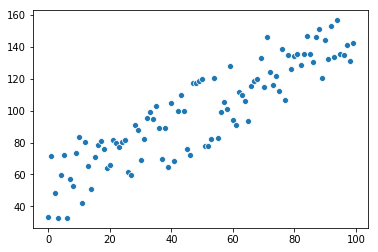

In [35]:
sns.scatterplot(x=x[:,1], y=y)

Iteration 0 | Cost: 462.584182
Iteration 1 | Cost: 459.548994
Iteration 2 | Cost: 456.684300
Iteration 3 | Cost: 453.980206
Iteration 4 | Cost: 451.427393
Iteration 5 | Cost: 449.017083
Iteration 6 | Cost: 446.741007
Iteration 7 | Cost: 444.591376
Iteration 8 | Cost: 442.560854
Iteration 9 | Cost: 440.642528
Iteration 10 | Cost: 438.829891
Iteration 11 | Cost: 437.116809
Iteration 12 | Cost: 435.497507
Iteration 13 | Cost: 433.966542
Iteration 14 | Cost: 432.518791
Iteration 15 | Cost: 431.149426
Iteration 16 | Cost: 429.853898
Iteration 17 | Cost: 428.627925
Iteration 18 | Cost: 427.467471
Iteration 19 | Cost: 426.368735
Iteration 20 | Cost: 425.328138
Iteration 21 | Cost: 424.342306
Iteration 22 | Cost: 423.408063
Iteration 23 | Cost: 422.522418
Iteration 24 | Cost: 421.682550
Iteration 25 | Cost: 420.885805
Iteration 26 | Cost: 420.129681
Iteration 27 | Cost: 419.411824
Iteration 28 | Cost: 418.730014
Iteration 29 | Cost: 418.082160
Iteration 30 | Cost: 417.466294
Iteration 31 | Cos

Iteration 2302 | Cost: 249.711009
Iteration 2303 | Cost: 249.662368
Iteration 2304 | Cost: 249.613742
Iteration 2305 | Cost: 249.565131
Iteration 2306 | Cost: 249.516535
Iteration 2307 | Cost: 249.467953
Iteration 2308 | Cost: 249.419386
Iteration 2309 | Cost: 249.370834
Iteration 2310 | Cost: 249.322297
Iteration 2311 | Cost: 249.273775
Iteration 2312 | Cost: 249.225267
Iteration 2313 | Cost: 249.176774
Iteration 2314 | Cost: 249.128296
Iteration 2315 | Cost: 249.079833
Iteration 2316 | Cost: 249.031384
Iteration 2317 | Cost: 248.982951
Iteration 2318 | Cost: 248.934531
Iteration 2319 | Cost: 248.886127
Iteration 2320 | Cost: 248.837737
Iteration 2321 | Cost: 248.789363
Iteration 2322 | Cost: 248.741002
Iteration 2323 | Cost: 248.692657
Iteration 2324 | Cost: 248.644326
Iteration 2325 | Cost: 248.596010
Iteration 2326 | Cost: 248.547709
Iteration 2327 | Cost: 248.499422
Iteration 2328 | Cost: 248.451151
Iteration 2329 | Cost: 248.402893
Iteration 2330 | Cost: 248.354651
Iteration 2331

Iteration 4556 | Cost: 170.372538
Iteration 4557 | Cost: 170.348050
Iteration 4558 | Cost: 170.323570
Iteration 4559 | Cost: 170.299097
Iteration 4560 | Cost: 170.274632
Iteration 4561 | Cost: 170.250174
Iteration 4562 | Cost: 170.225724
Iteration 4563 | Cost: 170.201281
Iteration 4564 | Cost: 170.176845
Iteration 4565 | Cost: 170.152417
Iteration 4566 | Cost: 170.127996
Iteration 4567 | Cost: 170.103583
Iteration 4568 | Cost: 170.079177
Iteration 4569 | Cost: 170.054779
Iteration 4570 | Cost: 170.030388
Iteration 4571 | Cost: 170.006004
Iteration 4572 | Cost: 169.981628
Iteration 4573 | Cost: 169.957259
Iteration 4574 | Cost: 169.932898
Iteration 4575 | Cost: 169.908544
Iteration 4576 | Cost: 169.884198
Iteration 4577 | Cost: 169.859859
Iteration 4578 | Cost: 169.835527
Iteration 4579 | Cost: 169.811203
Iteration 4580 | Cost: 169.786886
Iteration 4581 | Cost: 169.762577
Iteration 4582 | Cost: 169.738275
Iteration 4583 | Cost: 169.713980
Iteration 4584 | Cost: 169.689693
Iteration 4585

Iteration 6850 | Cost: 129.940150
Iteration 6851 | Cost: 129.927972
Iteration 6852 | Cost: 129.915796
Iteration 6853 | Cost: 129.903625
Iteration 6854 | Cost: 129.891457
Iteration 6855 | Cost: 129.879293
Iteration 6856 | Cost: 129.867133
Iteration 6857 | Cost: 129.854976
Iteration 6858 | Cost: 129.842823
Iteration 6859 | Cost: 129.830674
Iteration 6860 | Cost: 129.818529
Iteration 6861 | Cost: 129.806387
Iteration 6862 | Cost: 129.794249
Iteration 6863 | Cost: 129.782114
Iteration 6864 | Cost: 129.769983
Iteration 6865 | Cost: 129.757856
Iteration 6866 | Cost: 129.745733
Iteration 6867 | Cost: 129.733613
Iteration 6868 | Cost: 129.721497
Iteration 6869 | Cost: 129.709385
Iteration 6870 | Cost: 129.697276
Iteration 6871 | Cost: 129.685171
Iteration 6872 | Cost: 129.673070
Iteration 6873 | Cost: 129.660973
Iteration 6874 | Cost: 129.648879
Iteration 6875 | Cost: 129.636789
Iteration 6876 | Cost: 129.624702
Iteration 6877 | Cost: 129.612619
Iteration 6878 | Cost: 129.600540
Iteration 6879

Iteration 9045 | Cost: 110.440139
Iteration 9046 | Cost: 110.433897
Iteration 9047 | Cost: 110.427656
Iteration 9048 | Cost: 110.421418
Iteration 9049 | Cost: 110.415181
Iteration 9050 | Cost: 110.408946
Iteration 9051 | Cost: 110.402713
Iteration 9052 | Cost: 110.396482
Iteration 9053 | Cost: 110.390253
Iteration 9054 | Cost: 110.384026
Iteration 9055 | Cost: 110.377800
Iteration 9056 | Cost: 110.371577
Iteration 9057 | Cost: 110.365355
Iteration 9058 | Cost: 110.359135
Iteration 9059 | Cost: 110.352918
Iteration 9060 | Cost: 110.346702
Iteration 9061 | Cost: 110.340488
Iteration 9062 | Cost: 110.334276
Iteration 9063 | Cost: 110.328065
Iteration 9064 | Cost: 110.321857
Iteration 9065 | Cost: 110.315651
Iteration 9066 | Cost: 110.309446
Iteration 9067 | Cost: 110.303243
Iteration 9068 | Cost: 110.297042
Iteration 9069 | Cost: 110.290844
Iteration 9070 | Cost: 110.284647
Iteration 9071 | Cost: 110.278451
Iteration 9072 | Cost: 110.272258
Iteration 9073 | Cost: 110.266067
Iteration 9074

Iteration 11245 | Cost: 100.429111
Iteration 11246 | Cost: 100.425917
Iteration 11247 | Cost: 100.422723
Iteration 11248 | Cost: 100.419530
Iteration 11249 | Cost: 100.416338
Iteration 11250 | Cost: 100.413147
Iteration 11251 | Cost: 100.409957
Iteration 11252 | Cost: 100.406768
Iteration 11253 | Cost: 100.403580
Iteration 11254 | Cost: 100.400393
Iteration 11255 | Cost: 100.397207
Iteration 11256 | Cost: 100.394022
Iteration 11257 | Cost: 100.390838
Iteration 11258 | Cost: 100.387655
Iteration 11259 | Cost: 100.384473
Iteration 11260 | Cost: 100.381291
Iteration 11261 | Cost: 100.378111
Iteration 11262 | Cost: 100.374932
Iteration 11263 | Cost: 100.371753
Iteration 11264 | Cost: 100.368576
Iteration 11265 | Cost: 100.365400
Iteration 11266 | Cost: 100.362224
Iteration 11267 | Cost: 100.359050
Iteration 11268 | Cost: 100.355876
Iteration 11269 | Cost: 100.352704
Iteration 11270 | Cost: 100.349532
Iteration 11271 | Cost: 100.346362
Iteration 11272 | Cost: 100.343192
Iteration 11273 | Co

Iteration 13350 | Cost: 95.463229
Iteration 13351 | Cost: 95.461546
Iteration 13352 | Cost: 95.459864
Iteration 13353 | Cost: 95.458182
Iteration 13354 | Cost: 95.456500
Iteration 13355 | Cost: 95.454819
Iteration 13356 | Cost: 95.453139
Iteration 13357 | Cost: 95.451459
Iteration 13358 | Cost: 95.449779
Iteration 13359 | Cost: 95.448100
Iteration 13360 | Cost: 95.446422
Iteration 13361 | Cost: 95.444744
Iteration 13362 | Cost: 95.443066
Iteration 13363 | Cost: 95.441390
Iteration 13364 | Cost: 95.439713
Iteration 13365 | Cost: 95.438037
Iteration 13366 | Cost: 95.436362
Iteration 13367 | Cost: 95.434687
Iteration 13368 | Cost: 95.433013
Iteration 13369 | Cost: 95.431339
Iteration 13370 | Cost: 95.429666
Iteration 13371 | Cost: 95.427993
Iteration 13372 | Cost: 95.426320
Iteration 13373 | Cost: 95.424649
Iteration 13374 | Cost: 95.422977
Iteration 13375 | Cost: 95.421306
Iteration 13376 | Cost: 95.419636
Iteration 13377 | Cost: 95.417966
Iteration 13378 | Cost: 95.416297
Iteration 1337

Iteration 15488 | Cost: 92.818057
Iteration 15489 | Cost: 92.817179
Iteration 15490 | Cost: 92.816301
Iteration 15491 | Cost: 92.815424
Iteration 15492 | Cost: 92.814547
Iteration 15493 | Cost: 92.813670
Iteration 15494 | Cost: 92.812794
Iteration 15495 | Cost: 92.811918
Iteration 15496 | Cost: 92.811042
Iteration 15497 | Cost: 92.810166
Iteration 15498 | Cost: 92.809291
Iteration 15499 | Cost: 92.808416
Iteration 15500 | Cost: 92.807541
Iteration 15501 | Cost: 92.806666
Iteration 15502 | Cost: 92.805792
Iteration 15503 | Cost: 92.804918
Iteration 15504 | Cost: 92.804044
Iteration 15505 | Cost: 92.803171
Iteration 15506 | Cost: 92.802297
Iteration 15507 | Cost: 92.801424
Iteration 15508 | Cost: 92.800552
Iteration 15509 | Cost: 92.799679
Iteration 15510 | Cost: 92.798807
Iteration 15511 | Cost: 92.797935
Iteration 15512 | Cost: 92.797064
Iteration 15513 | Cost: 92.796192
Iteration 15514 | Cost: 92.795321
Iteration 15515 | Cost: 92.794450
Iteration 15516 | Cost: 92.793580
Iteration 1551

Iteration 17599 | Cost: 91.450909
Iteration 17600 | Cost: 91.450447
Iteration 17601 | Cost: 91.449986
Iteration 17602 | Cost: 91.449524
Iteration 17603 | Cost: 91.449063
Iteration 17604 | Cost: 91.448602
Iteration 17605 | Cost: 91.448141
Iteration 17606 | Cost: 91.447681
Iteration 17607 | Cost: 91.447220
Iteration 17608 | Cost: 91.446760
Iteration 17609 | Cost: 91.446299
Iteration 17610 | Cost: 91.445839
Iteration 17611 | Cost: 91.445379
Iteration 17612 | Cost: 91.444919
Iteration 17613 | Cost: 91.444459
Iteration 17614 | Cost: 91.444000
Iteration 17615 | Cost: 91.443540
Iteration 17616 | Cost: 91.443081
Iteration 17617 | Cost: 91.442622
Iteration 17618 | Cost: 91.442163
Iteration 17619 | Cost: 91.441704
Iteration 17620 | Cost: 91.441245
Iteration 17621 | Cost: 91.440786
Iteration 17622 | Cost: 91.440328
Iteration 17623 | Cost: 91.439870
Iteration 17624 | Cost: 91.439411
Iteration 17625 | Cost: 91.438953
Iteration 17626 | Cost: 91.438495
Iteration 17627 | Cost: 91.438038
Iteration 1762

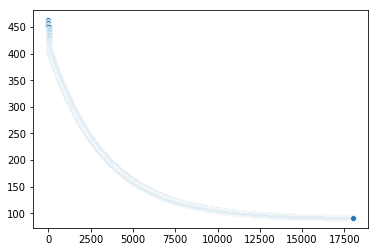

In [38]:
numEpochs= 18000
alpha = 0.0006
theta = np.array([1.9059518,1.534264])
costs = gradientDescent(x, y, theta, alpha, m, numEpochs)

### Google's Version
https://developers.google.com/machine-learning/crash-course/fitter/graph



#### Adaptive Learning Rates

The performance of the model on the training dataset can be monitored by the learning algorithm and the learning rate can be adjusted in response.

This is called an **adaptive learning rate**.

Perhaps the simplest implementation is to make the learning rate smaller once the performance of the model plateaus, such as by decreasing the learning rate by a factor of two or an order of magnitude.

A function that determines the learning rate at each step is called the *learning schedule*.

https://towardsdatascience.com/learning-rate-schedules-and-adaptive-learning-rate-methods-for-deep-learning-2c8f433990d1

https://machinelearningmastery.com/learning-rate-for-deep-learning-neural-networks/

# Applying Gradient Descent

 *Gradient Descent* is a very generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The general idea of Gradient Descent is to tweak parameters iteratively in order to minimize a cost function.

When doing GD it is important to scale your features to a similiar scale or else it will take the algorithm longer to converge. 

<img src='./resources/scalecontour.png' width=500/>

## Batches

In gradient descent, a **batch** is the total number of examples you use to calculate the gradient in a single iteration. So far, we've assumed that the batch has been the entire data set. 

### Batch Gradient Descent

* This formula involves caluclations over the full training set X, at each Gradient Descent step. 
* Terribly slow on large number of observations, but scales well with the number of features.
* When training a Linear Regression model with hundreds of thousands of features Gradient Descent is much faster than using linear algebra and the Normal Equation.


### Stochastic Gradient Descent (SGD)

- Picks a random instance in the training set at every step and computes the gradients based only on that single instance. 

- Algorithm is much faster given it has very little data to manipulate. 

- Can be used as an out-of-core algorithm, since it only needs one data observation at a time

When the cost function is very irregular, SGD has a better chance of of finding the global minimum than BGD.
This could be bad because the algorithm will never settle at a minimum.  
One way to avoid this is by reducing the learning rate (step size) as the algorithm progresses. 



### Mini-batch Gradient Descent

At each step, computing the gradietns is based on a small random set of instaces called *mini-batches*.

Mini-batch GD will be less erratic than SGD because it is training on a multiple data instances. 

Faster than Batch GD.

Harder to escape local minima than SGD.

### Epochs

The number of epochs is a hyperparameter that defines the number times that the learning algorithm will work through the entire training dataset.
One epoch is when an ENTIRE dataset is passed through the model one time.


#### How many epochs should we have?

Train each model along a sufficient number of epochs to see the training loss become stuck in a minimum. 

Many algorithms allow you to set up a parameter so that whenever you see the loss not improve after a number of epochs, it stops.  

### Iterations

**Iterations** is the number of batches needed to complete one epoch.

Let’s say we have 2000 training examples that we are going to use. We can divide the dataset of 2000 examples into batches of 500 then it will take 4 iterations to complete 1 epoch.

### Question:

Why would you use more than 1 epoch when fitting your model?

### Comparison of Types of Gradient Descent

<img src='./resources/comparegdtypes.png' width=600/>

<img src='./resources/algotable.png' width=600/>

<img src='./resources/albotable2.png' width=600/>

https://github.com/ageron/handson-ml.git

https://developers.google.com/machine-learning/crash-course/reducing-loss/playground-exercise